In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from utils import file_to_dict, scatter_plot, ROOT, plot_datasets, models, show_results

## Visualize the datasets (run the next cell)

In [ ]:
plot_datasets()

## Fisher LDA

### Questions 1-a and 1-b on paper

### End of question 1-b

The equation $p(y=1|x)$ obtained for the Fisher LDA model is exactly the same as what we would obtain if we were to use the generic Logistic Regression formula for densities that belong to the exponential families (seen in class), if we made the assumption that both densities are Gaussian with the same covariance matrix. 

However, if we were to compare to Logistic Regression in the sense of "finding a vector $w$ such that $p(y=1|x) = \sigma(w^T x)$", then this won't necessarily mean that we make the "same covariance matrix" assumption anymore, and the results would be different (as would show us Question 2)

### Question 1-c

classificationA: {'pi': 0.3333333333333333, 'mu_0': array([ 2.9 , -0.89]), 'mu_1': array([-2.69,  0.87]), 'sigma': array([[ 2.48, -1.15],
       [-1.15,  0.62]])}

classificationB: {'pi': 0.5, 'mu_0': array([ 3.34, -0.84]), 'mu_1': array([-3.22,  1.08]), 'sigma': array([[ 3.37, -0.14],
       [-0.14,  1.75]])}

classificationC: {'pi': 0.625, 'mu_0': array([ 2.79, -0.84]), 'mu_1': array([-2.94, -0.96]), 'sigma': array([[ 2.89, -0.64],
       [-0.64,  5.22]])}



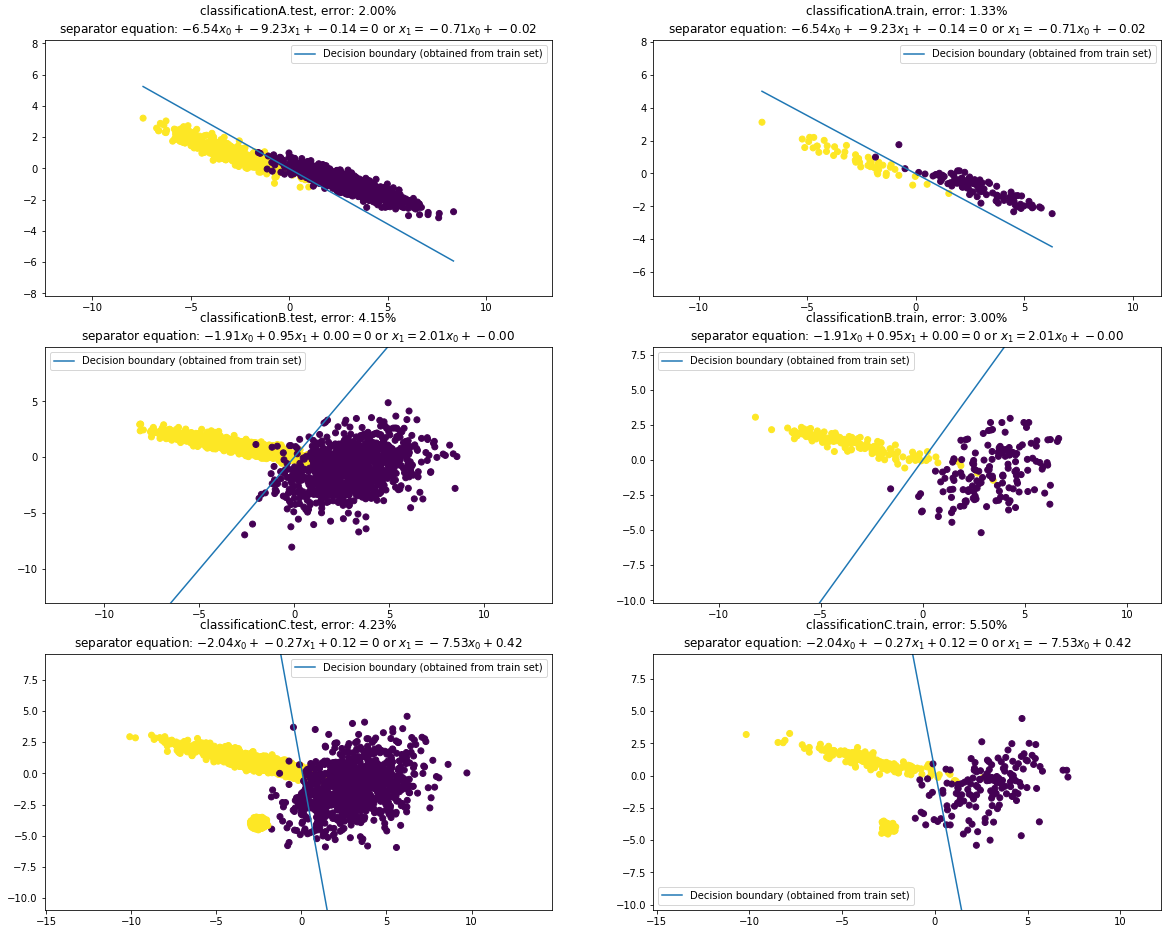

In [2]:
# Train models on the 3 training datasets
fda_models = models('FDA')

np.set_printoptions(precision=2)
for dataset, model in fda_models.items():
    print('{}: {}\n'.format(dataset, {key: value.squeeze() for key, value in model.params.items()}))

# Scatter plot the data, with the class separators. Show the classification error and the separator equation
show_results(fda_models)

# Logistic regression

### Questions 2-a and 2-b

/Users/salem/Dropbox/Courses/IFT6269/HW2/utils.py:13: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(- z))


classificationA: {'w': array([-319.35, -553.01,  -53.29])}

classificationB: {'w': array([-1.71,  1.02,  1.35])}

classificationC: {'w': array([-2.2 ,  0.71,  0.96])}



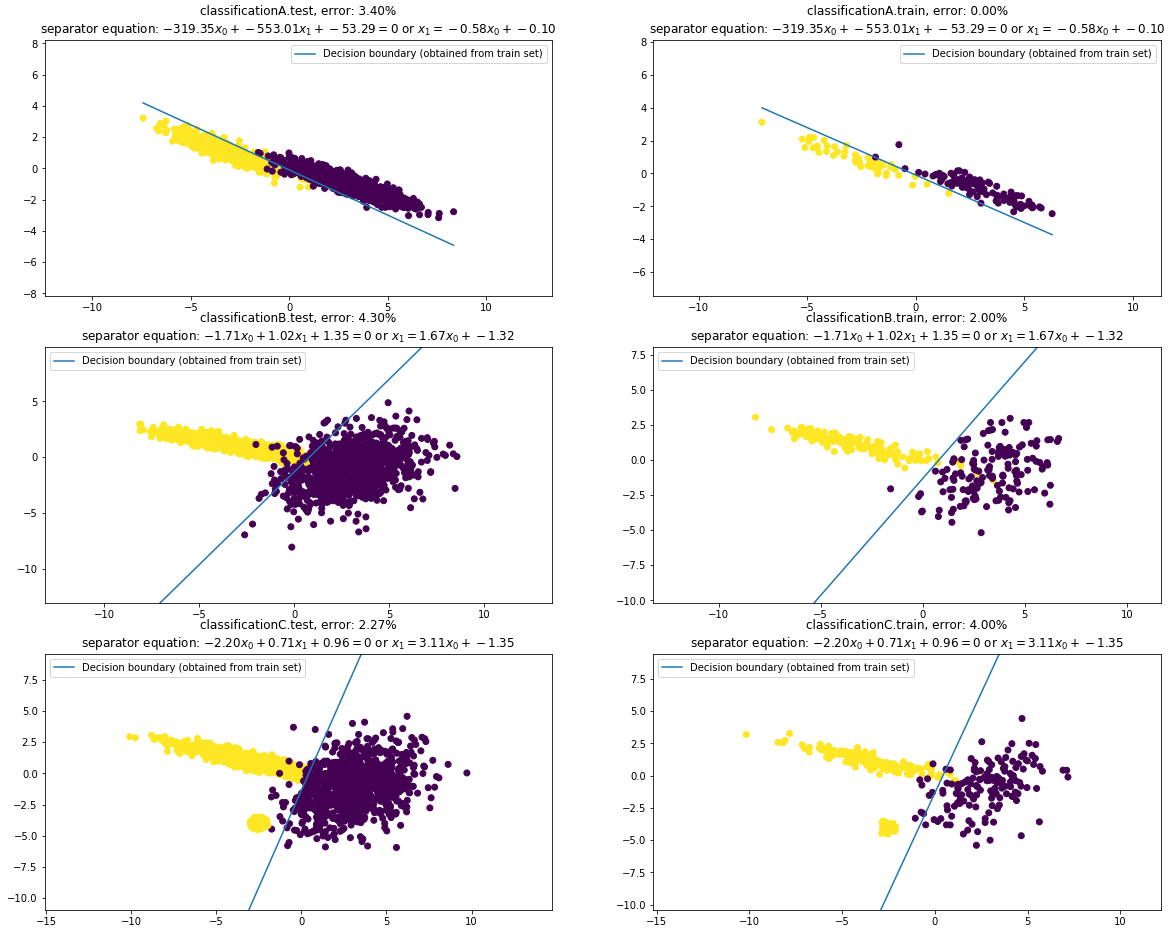

In [3]:
# Train models on the 3 training datasets
log_reg_models = models('LogReg')

np.set_printoptions(precision=2)
for dataset, model in log_reg_models.items():
    print('{}: {}\n'.format(dataset, {key: value.squeeze() for key, value in model.params.items()}))

# Scatter plot the data, with the class separators. Show the classification error and the separator equation
show_results(log_reg_models)

# Linear regression

### Questions 3-a and 3-b

/Users/salem/Dropbox/Courses/IFT6269/HW2/linear_regression.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.dot(X_with_bias.T, Y.reshape(n, 1)))


classificationA: {'w': array([-0.26, -0.37,  0.49])}

classificationB: {'w': array([-0.1 ,  0.05,  0.5 ])}

classificationC: {'w': array([-0.13, -0.02,  0.51])}



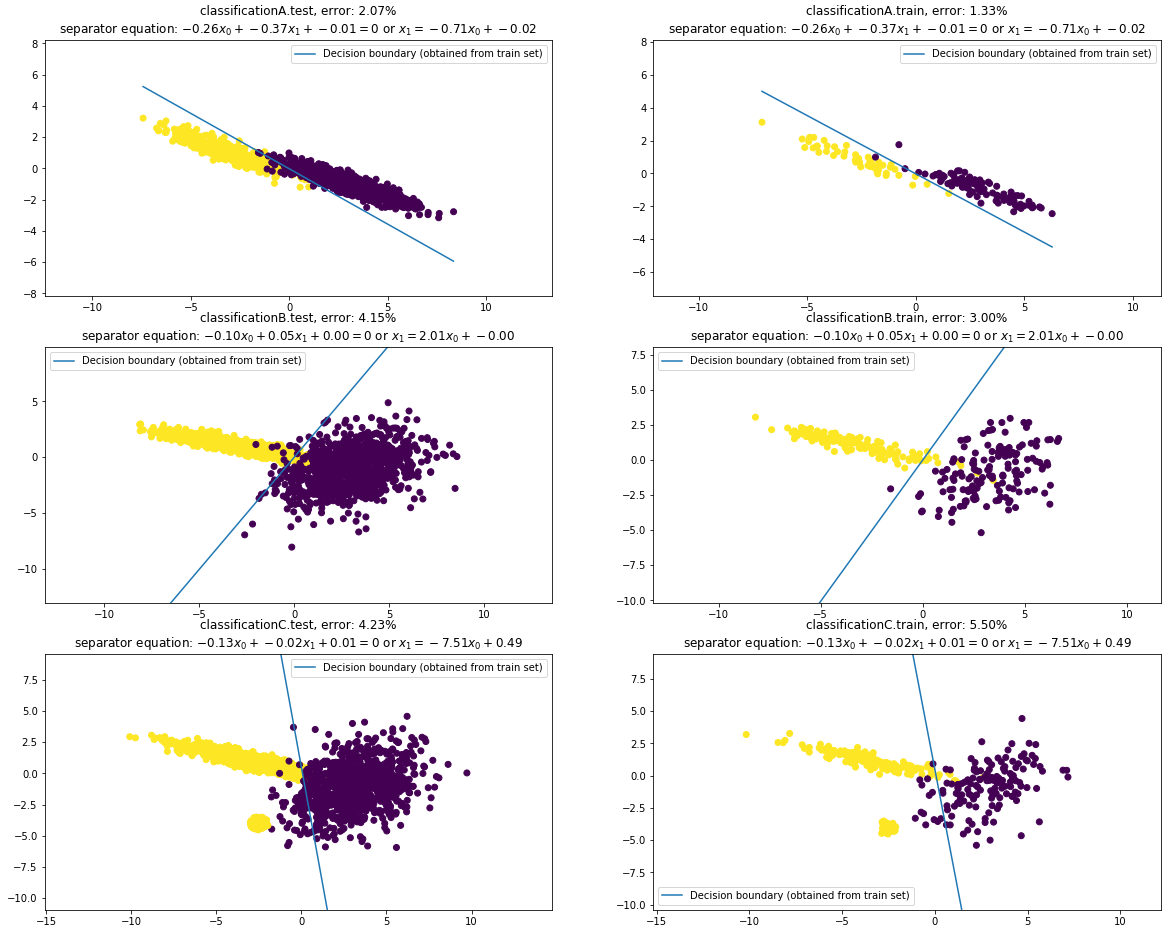

In [4]:
# Train models on the 3 training datasets
lin_reg_models = models('LinReg')

np.set_printoptions(precision=2)
for dataset, model in lin_reg_models.items():
    print('{}: {}\n'.format(dataset, {key: value.squeeze() for key, value in model.params.items()}))

# Scatter plot the data, with the class separators. Show the classification error and the separator equation
show_results(lin_reg_models)

## Question 4

### Question 4-1

Please check the titles of each subplot for the above subplots. They contain the classification errors for train and test data !

Misclassification errors:

| Dataset/Model | FDA                       | Logistic Regression       | Linear Regression         |
|---------------|---------------------------|---------------------------|---------------------------|
| A             | train: 1.33%, test: 2.00% | train: 0.00%, test: 3.47% | train: 1.33%, test: 2.07% |
| B             | train: 3.00%, test: 4.15% | train: 2.00%, test: 4.30% | train: 3.00%, test: 4.15% |
| C             | train: 5.50%, test: 4.23% | train: 4.00%, test: 2.27% | train: 5.50%, test: 4.23% |

Note that the 0.07% difference between the test errors of FDA and Linear Regression on Dataset A represents **ONE** test example (there are 1500 in total)

### Question 4-2

- For datasets A and B, the errors are smaller on the training set. This is expected, as those are the sets on which training is done, and the learned classifiers tend to take into account the particularities of the training sets and model the corresponding noise. Generalizing to other datasets (the test sets), albeit drawn from the same distribution, naturally yields lower performances.
- For dataset C, the test error is actually smaller. This can be explained by the sizes of the train and test datasets (400 and 3000 respectively), that make it not unlikely, given the data generating process, that there are more (in proportion) "harder" cases in the train set than in the test set. And by "harder" I mean far away from the mean of the distribution used to generate data.

- Interestingly, FDA and Linear Regression yield exactly the same result, except on that **ONE** test example of dataset A aforementioned, that can be explained by the numerical rounding errors from all the matrix multiplications that were done to obtain the decision boundaries, and the fact that some points are super likely to fall super close to the separator. The linear decision boundaries are exactly the same as well (up to 2 decimals), i.e. the coefficients are proportional to each other. 
- Logisitc regression yields different results than FDA/LogisticRegression. In all cases, it yields better training performance compared to the 2 other methods. This can be explained by the fact that, as opposed to FDA, fitting a logistic regression model does not make the implicit assumption that the 2 classes come from normal distributions with the same covariance matrix. It is then pretty obvious why it's better (on the train set) for datasets B and C. Why is it better for dataset A ? My best guess would be that it's because it might model the noise in the trainset, and results in "thinking" that the the data from the two classes come from a distribution slightly more "irregular" than a normal distribution. Obviously, caring more about the particularities of the training sets, make the Logistic Regression models more prone to overfitting, and this explains the lower test performances (as compared to FDA) for datasets A and B. The test performance is interestingly better for dataset C, probably because of the fact that FDA/LinearRegression are not in an overfitting regime just yet for this dataset, but rather a combination of both underfitting and overfitting. And improving performance on the train set, leaves room to also improve that on the test set !

- To sum up: 
 - for dataset A: FDA performs the best (on the test set). Logistic Regression is better on the train set because it goes beyond the Gaussian assumption and models the training set "noise" that obviously is not present in the test set.
 - for dataset B: FDA performs very slightly better on the test set, although I would have expected Logistic Regression to be better (it is on the train set) because it doesn't implicitly make the same-covariances assumption. My best guess would be that having a much better train set performance led it to the overfitting regime, and regularizing it might help !
 - for dataset C: Logistic regression is better on both the train and the test sets, for the reasons discussed above.
 
- Note: It is theoretically proven that in binary classification, using Linear Regression is equivalent to using Fisher LDA.

## QDA

See paper for derivation of the maximum likelihood estimator

### Question 5-a, 5-b, and 5-c

classificationA: {'pi': 0.3333333333333333, 'mu_0': array([ 2.9 , -0.89]), 'mu_1': array([-2.69,  0.87]), 'sigma_0': array([[ 2.33, -1.06],
       [-1.06,  0.58]]), 'sigma_1': array([[ 2.76, -1.33],
       [-1.33,  0.7 ]])}

classificationB: {'pi': 0.5, 'mu_0': array([ 3.34, -0.84]), 'mu_1': array([-3.22,  1.08]), 'sigma_0': array([[2.56, 1.07],
       [1.07, 2.98]]), 'sigma_1': array([[ 4.18, -1.34],
       [-1.34,  0.52]])}

classificationC: {'pi': 0.625, 'mu_0': array([ 2.79, -0.84]), 'mu_1': array([-2.94, -0.96]), 'sigma_0': array([[2.92, 1.25],
       [1.25, 2.94]]), 'sigma_1': array([[ 2.88, -1.77],
       [-1.77,  6.59]])}



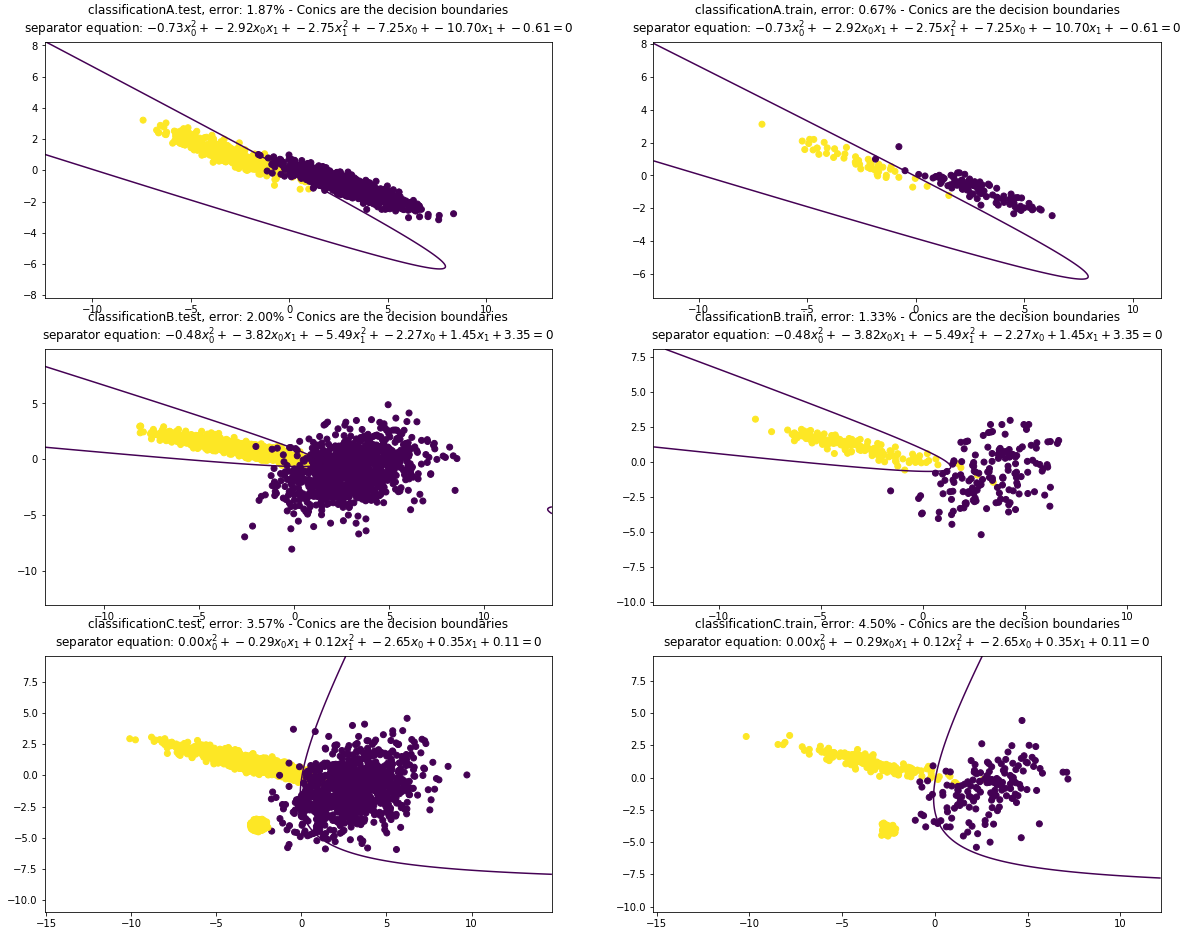

In [5]:
# Train models on the 3 training datasets
qda_models = models('QDA')

np.set_printoptions(precision=2)
for dataset, model in qda_models.items():
    print('{}: {}\n'.format(dataset, {key: value.squeeze() for key, value in model.params.items()}))

# Scatter plot the data, with the class separators. Show the classification error and the separator equation
show_results(qda_models, quadratic=True)

##### Note that the curves shown above are parts of hyperbola. They are not parabola ! :)

### Question 5-d

| Dataset/Model | FDA                       | Logistic Regression       | Linear Regression         | QDA                       |
|---------------|---------------------------|---------------------------|---------------------------|---------------------------|
| A             | train: 1.33%, test: 2.00% | train: 0.00%, test: 3.47% | train: 1.33%, test: 2.07% | train: 0.67%, test: 1.87% |
| B             | train: 3.00%, test: 4.15% | train: 2.00%, test: 4.30% | train: 3.00%, test: 4.15% | train: 1.33%, test: 2.00% |
| C             | train: 5.50%, test: 4.23% | train: 4.00%, test: 2.27% | train: 5.50%, test: 4.23% | train: 4.50%, test: 3.57% |


- For dataset B, QDA performs the best on both the training and test sets. It is pretty obvious why, given the the heteroscedasticity of the data, and the fact that FDA is not designed for this specific problem. The dataset is not linearly separable, and that explains why Logistic Regression is not as good.
- For dataset A, we can observe that FDA learns parameters corresponding to a class of linear functions, which is actually a subset of the quadratic functions that QDA learns. This means that, in a sense, QDA has more capacity, while still allowing, in theory, for all the possible classifiers FDA could yield. This might explain why QDA outperforms FDA on the train set. And while train data is linearly separable (which explains why Logistic Regression performs the best on the train set), a quadratic boundary seems more appropriate (once we observe the data) for the test set. That might explain why QDA has the best performance on the test set.
- For dataset C, we shouldn't expect QDA to perform super well given that the data coming from one of the two classes is generated according to a Mixture of Gaussians and not a Gaussian, as required by QDA. This might explain why a linear classifier that makes no assumptions on the distribution of the data (Logistic Regression) might still be better, which is what we observe ! QDA performs better than FDA though for the same reasons given for dataset A.
